In [12]:
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path
from skimage.measure import label
from skimage.morphology import binary_opening

from cryofib.n5_utils import read_volume, print_key_tree
from cryofib.data_loaders import load_F107_A1_pred, load_F107_A1_multicut, load_F107_A1_corrected

In [2]:
def fast_count_unique(array: np.array):
    if array.dtype is not np.int64:
        print(f"array type is {array.dtype}. Converting to int64, possibly can cause errors")
    n_features = int(np.max(array))
    counts = np.bincount(array.flatten().astype(np.int64), minlength=n_features + 1)
    return np.arange(n_features + 1), counts

In [3]:
f_multi = load_F107_A1_corrected()

In [4]:
print_key_tree(f_multi)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut_corrected.n5
segmentation_corrected


In [5]:
roi = np.s_[:]
multicut = read_volume(f_multi, "segmentation_corrected", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation_corrected from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut_corrected.n5
Read volume with shape (1350, 1506, 1647), data type uint32


In [11]:
output = np.zeros_like(multicut)

In [6]:
indices, counts = fast_count_unique(multicut)

array type is uint32. Converting to int64, possibly can cause errors


In [7]:
counts_nonzero = counts[counts > 0]
indices_nonzero = indices[counts > 0]

In [ ]:
cur_idx = 3

for idx, count in zip(indices_nonzero, counts_nonzero):
    print("Label ", idx, count)
    multicut_idx = (multicut == idx).astype(np.uint8)
    multicut_idx = binary_opening(multicut_idx)
    labeled, num = label(multicut_idx, return_num=True)
    print("Number of components", num)
    print()

In [10]:
len(counts_nonzero)

1256

(array([12.,  0.,  0., 10.,  0.,  3.,  3.,  4.,  1.,  4.,  4.,  6.,  2.,
         5., 11.,  7., 10.,  7.,  7.,  5.,  5.,  5.,  8.,  5.,  5., 10.,
         8., 13.,  8., 10., 11.,  5.,  3., 12.,  4.,  3.,  9.,  6.,  6.,
        10.,  7., 13., 10., 10., 36., 74., 74., 71., 84., 63., 66., 68.,
        56., 40., 50., 36., 37., 20., 24., 16., 20., 17., 15., 13.,  7.,
        16.,  5.,  8.,  4.,  2.,  2.,  3.,  3.,  0.,  1.,  6.,  1.,  3.,
         2.,  2.,  0.,  1.,  1.,  3.,  1.,  3.,  5.,  2.,  1.,  1.,  1.,
         2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.0899488 , 0.1798976 , 0.2698464 , 0.3597952 ,
        0.449744  , 0.5396928 , 0.6296416 , 0.7195904 , 0.8095392 ,
        0.899488  , 0.9894368 , 1.0793856 , 1.16933441, 1.25928321,
        1.34923201, 1.43918081, 1.52912961, 1.61907841, 1.70902721,
        1.79897601, 1.88892481, 1.97887361, 2.06882241, 2.15877121,
        2.24872001, 2.33866881, 2.42861761, 2.51856641, 2.60851521,
        2.69846401, 2.7884

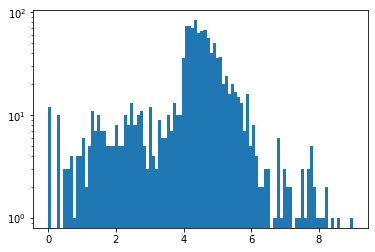

In [8]:
plt.hist(np.log10(counts_nonzero), bins=100, log=True)

(array([1.228e+03, 4.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

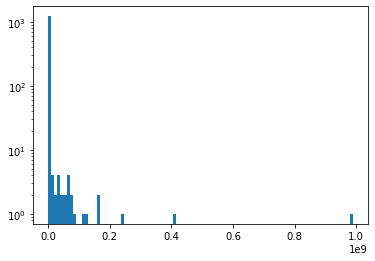

In [9]:
plt.hist(counts_nonzero, bins=100, log=True)

In [26]:
len(counts_nonzero)

191964